In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Copy of Hackathon_Dataset.xlsx')
origdata=pd.read_excel('/content/drive/MyDrive/Copy of Hackathon_Dataset.xlsx')

In [ ]:
data.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer


In [ ]:
nl_values=data.isnull().sum()
nl_values.to_frame('count')

,count
order_no,0
order_date,0
buyer,0
ship_city,0
ship_state,0
sku,0
description,0
quantity,0
item_total,39
shipping_fee,65


In [ ]:
values = []
for cur in data['item_total']:
    if pd.isna(cur):
        values.append(0.0)  # Handle missing values (NaN)
    else:
        c = float(cur.replace('₹', '').replace(',', ''))  # Convert string to float after removing '₹' and commas
        values.append(c)

print(values)
data['item_total']=values

[449.0, 449.0, 449.0, 0.0, 1099.0, 200.0, 0.0, 399.0, 399.0, 1099.0, 449.0, 449.0, 449.0, 1099.0, 0.0, 1099.0, 649.0, 449.0, 399.0, 399.0, 399.0, 449.0, 0.0, 399.0, 0.0, 649.0, 250.0, 449.0, 399.0, 449.0, 449.0, 399.0, 449.0, 449.0, 250.0, 399.0, 399.0, 449.0, 399.0, 0.0, 549.0, 250.0, 449.0, 0.0, 449.0, 250.0, 1099.0, 0.0, 1099.0, 649.0, 449.0, 399.0, 175.0, 449.0, 549.0, 399.0, 175.0, 399.0, 1299.0, 175.0, 175.0, 399.0, 399.0, 349.0, 0.0, 449.0, 399.0, 449.0, 449.0, 449.0, 399.0, 250.0, 349.0, 549.0, 1299.0, 449.0, 349.0, 250.0, 449.0, 549.0, 399.0, 399.0, 399.0, 549.0, 449.0, 250.0, 898.0, 0.0, 399.0, 449.0, 1099.0, 399.0, 649.0, 399.0, 399.0, 449.0, 0.0, 1347.0, 549.0, 399.0, 449.0, 549.0, 499.0, 449.0, 649.0, 399.0, 0.0, 475.0, 399.0, 1299.0, 449.0, 1299.0, 549.0, 399.0, 0.0, 0.0, 1299.0, 3897.0, 449.0, 449.0, 1499.0, 3897.0, 349.0, 449.0, 449.0, 399.0, 349.0, 449.0, 899.0, 475.0, 549.0, 449.0, 399.0, 449.0, 0.0, 449.0, 1796.0, 449.0, 449.0, 549.0, 399.0, 349.0, 449.0, 475.0, 449.

In [ ]:
values = []
for cur in data['shipping_fee']:
    if pd.isna(cur):
        values.append(0.0)  # Handle missing values (NaN)shipping_fee
    else:
        c = float(cur.replace('₹', '').replace(',', ''))  # Convert string to float after removing '₹' and commas
        values.append(c)

print(values)
data['shipping_fee']=values

[0.0, 60.18, 60.18, 0.0, 84.96, 0.0, 0.0, 84.96, 84.96, 0.0, 114.46, 60.18, 84.96, 84.96, 84.96, 62.54, 81.42, 84.96, 84.96, 84.96, 84.96, 60.18, 84.96, 84.96, 0.0, 60.18, 0.0, 84.96, 84.96, 0.0, 60.18, 60.18, 84.96, 84.96, 47.2, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 47.2, 0.0, 60.18, 0.0, 60.18, 0.0, 84.96, 84.96, 0.0, 0.0, 84.96, 47.2, 47.2, 0.0, 84.96, 178.18, 0.0, 0.0, 84.96, 84.96, 0.0, 84.96, 84.96, 84.96, 84.96, 0.0, 47.2, 60.18, 0.0, 0.0, 0.0, 210.04, 84.96, 0.0, 84.96, 60.18, 84.96, 84.96, 47.2, 84.96, 114.46, 84.96, 81.42, 84.96, 84.96, 210.04, 0.0, 0.0, 84.96, 60.18, 0.0, 84.96, 84.96, 84.96, 84.96, 84.96, 0.0, 60.18, 84.96, 84.96, 84.96, 60.18, 84.96, 84.96, 84.96, 84.96, 80.24, 84.96, 146.32, 60.18, 84.96, 84.96, 84.96, 114.46, 133.34, 84.96, 84.96, 114.46, 241.9, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 114.46, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 84.96, 47.2, 47.2, 84.96, 84.96, 47.2, 84.96, 84.96, 84.96, 60.18, 84.96, 84.96, 

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['cod'].fillna('Online payment',inplace=True)

In [ ]:
data.isnull().sum()

order_no        0
order_date      0
buyer           0
ship_city       0
ship_state      0
sku             0
description     0
quantity        0
item_total      0
shipping_fee    0
cod             0
order_status    0
dtype: int64

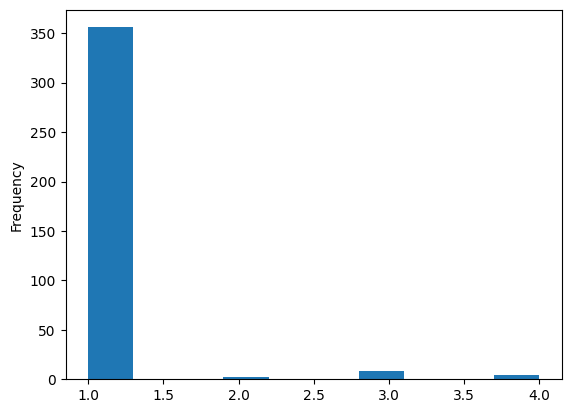

In [ ]:
data["quantity"].plot.hist();

In [ ]:
state_shipping_relation = data.groupby(['ship_state', 'order_status']).size().unstack(fill_value=0)
state_shipping_relation

order_status,Delivered to buyer,Returned to seller
ship_state,,
ANDHRA PRADESH,6,2
ARUNACHAL PRADESH,3,1
ASSAM,3,5
Andhra Pradesh,2,0
BIHAR,3,0
CHANDIGARH,4,4
"CHANDIGARH,",4,0
CHHATTISGARH,10,0
DELHI,13,4


In [ ]:
place = ['ship_city']
for i in place:
    data[i] = data[i].apply(lambda x: x.upper())

In [ ]:
# Combining ship_city and ship_state into one column as ship_place
data["ship_place"] = data["ship_city"] + " " + data["ship_state"]
data["ship_place"]

0             CHANDIGARH, CHANDIGARH
1        PASIGHAT, ARUNACHAL PRADESH
2        PASIGHAT, ARUNACHAL PRADESH
3             DEVARAKONDA, TELANGANA
4                MUMBAI, MAHARASHTRA
                   ...              
365              MUMBAI, MAHARASHTRA
366                 KODAD, TELANGANA
367             HYDERABAD, TELANGANA
368           INDORE, MADHYA Pradesh
369    VISAKHAPATNAM, ANDHRA PRADESH
Name: ship_place, Length: 370, dtype: object

In [ ]:
del data["ship_city"]
del data["ship_state"]

In [ ]:
data['ship_place'].value_counts()

MUMBAI, MAHARASHTRA      40
BENGALURU, KARNATAKA     31
KOLKATA, WEST BENGAL     30
HYDERABAD, TELANGANA     21
CHENNAI, TAMIL NADU      18
                         ..
TUTICORIN, TAMIL NADU     1
JAIPUR, RAJASTHAN         1
PALAI, KERALA             1
KORBA, CHHATTISGARH       1
DURG, CHHATTISGARH        1
Name: ship_place, Length: 77, dtype: int64

In [ ]:
data.drop(['order_no'],axis=1,inplace=True )
data.drop(['order_date'],inplace=True,axis=1)

In [ ]:
data.head(5)

,buyer,sku,description,quantity,item_total,shipping_fee,cod,order_status,ship_place
0,Mr.,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,0.00,Online payment,Delivered to buyer,"CHANDIGARH, CHANDIGARH"
1,Minam,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online payment,Delivered to buyer,"PASIGHAT, ARUNACHAL PRADESH"
2,yatipertin,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online payment,Delivered to buyer,"PASIGHAT, ARUNACHAL PRADESH"
3,aciya,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,0.0,0.00,Cash On Delivery,Delivered to buyer,"DEVARAKONDA, TELANGANA"
4,Susmita,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,84.96,Online payment,Delivered to buyer,"MUMBAI, MAHARASHTRA"


In [ ]:
data.dtypes

buyer            object
sku              object
description      object
quantity          int64
item_total      float64
shipping_fee    float64
cod              object
order_status     object
ship_place       object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
data['buyer'].nunique()

318

In [ ]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [ ]:
data.drop(['description'],axis=1,inplace=True) # As most of the values are unique

In [ ]:
label_encoder=EncoderExt()
label_encoder.fit(data['sku'])
data['sku_enc']=label_encoder.transform(data['sku'])
data.drop(['sku'],axis=1,inplace=True)
data.head(5)

,buyer,quantity,item_total,shipping_fee,cod,order_status,ship_place,sku_enc
0,Mr.,1,449.0,0.00,Online payment,Delivered to buyer,"CHANDIGARH, CHANDIGARH",2
1,Minam,1,449.0,60.18,Online payment,Delivered to buyer,"PASIGHAT, ARUNACHAL PRADESH",22
2,yatipertin,1,449.0,60.18,Online payment,Delivered to buyer,"PASIGHAT, ARUNACHAL PRADESH",22
3,aciya,1,0.0,0.00,Cash On Delivery,Delivered to buyer,"DEVARAKONDA, TELANGANA",17
4,Susmita,1,1099.0,84.96,Online payment,Delivered to buyer,"MUMBAI, MAHARASHTRA",29


In [ ]:
data['order_status']=data['order_status'].str.replace('Delivered to buyer','0').str.replace('Returned to seller','1').astype(int)
data['order_status'].value_counts()

0    289
1     81
Name: order_status, dtype: int64

In [ ]:
data['cod']=data['cod'].str.replace('Online payment','1').str.replace('Cash On Delivery','2').astype(int)
data['cod'].value_counts()

1    270
2    100
Name: cod, dtype: int64

In [ ]:
data.head(2)

,buyer,quantity,item_total,shipping_fee,cod,order_status,ship_place,sku_enc
0,Mr.,1,449.0,0.00,1,0,"CHANDIGARH, CHANDIGARH",2
1,Minam,1,449.0,60.18,1,0,"PASIGHAT, ARUNACHAL PRADESH",22


In [ ]:
label_encoder = EncoderExt()
label_encoder.fit(data['buyer'])
data['buyer']=label_encoder.transform(data['buyer'])

In [ ]:
label_encoder = EncoderExt()
label_encoder.fit(data['ship_place'])
data['ship_place_enc']=label_encoder.transform(data['ship_place'])

In [ ]:
#data.drop(['description','ship_place'],axis=1,inplace=True)

In [ ]:
data.dtypes

buyer               int64
quantity            int64
item_total        float64
shipping_fee      float64
cod                 int64
order_status        int64
ship_place         object
sku_enc             int64
ship_place_enc      int64
dtype: object

In [ ]:
Y=data['order_status']
X=data[['quantity','item_total','shipping_fee','cod','sku_enc','buyer','ship_place_enc']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y ,train_size=0.7,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((259, 7), (111, 7), (259,), (111,))

In [ ]:
from sklearn.feature_selection import VarianceThreshold
#To remove constant or near constant features
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

7

In [ ]:
#Find constant columns
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


In [ ]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)
scores

array([0.68918919, 0.62162162, 0.60810811, 0.63513514, 0.63513514])

In [ ]:
scores.mean()

0.6378378378378378

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.694980694980695

In [ ]:
bag_model.score(X_test, y_test)

0.7387387387387387

In [ ]:
features = X_test[X_test.columns]
features
pred = bag_model.predict(features)
for index in pred:
  if(pred[index] != 0):
    print(origdata.iloc[index])
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0])

In [ ]:
all_data = pd.concat([X_train, X_test], axis=0, ignore_index=True)

df = pd.DataFrame(data)
# Iterate over each row in all_data and make predictions
for index, row in all_data.iterrows():
    features = row.values.reshape(1, -1)  # Convert the row to a 2D array
    prediction = bag_model.predict(features)

    if (prediction[0] != 0):
      print(origdata.iloc[index])

    #print(f"Row {index + 1} - Predicted Output: {prediction[0]}")

#prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      171-8103182-4289117
order_date                        Sun, 28 Nov, 2021, 10:20 pm IST
buyer                                                  yatipertin
ship_city                                               PASIGHAT,
ship_state                                      ARUNACHAL PRADESH
sku                                            SKU:  DN-0WDX-VYOT
description     Women's Set of 5 Multicolor Pure Leather Singl...
quantity                                                        1
item_total                                                ₹449.00
shipping_fee                                               ₹60.18
cod                                                           NaN
order_status                                   Delivered to buyer
Name: 2, dtype: object
order_no                                      405-3171677-9557154
order_date                         Wed, 28 Jul, 2021, 4:06 am IST
buyer                                                

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      171-6105173-4790734
order_date                         Fri, 26 Nov, 2021, 7:22 pm IST
buyer                                                     Geetika
ship_city                                               GURUGRAM,
ship_state                                                HARYANA
sku                                            SKU:  DN-0WDX-VYOT
description     Women's Set of 5 Multicolor Pure Leather Singl...
quantity                                                        1
item_total                                                    NaN
shipping_fee                                               ₹84.96
cod                                                           NaN
order_status                                   Returned to seller
Name: 22, dtype: object
order_no                                      403-7876698-8356365
order_date                         Fri, 25 Jun, 2021, 7:48 am IST
buyer                                               

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      403-0713090-0169940
order_date                         Thu, 28 Oct, 2021, 3:54 pm IST
buyer                                                      sayani
ship_city                                                KOLKATA,
ship_state                                            WEST BENGAL
sku                                            SKU:  9S-GE8P-RIR4
description     Pure 100% Leather Block Print Rectangular Jewe...
quantity                                                        1
item_total                                                ₹250.00
shipping_fee                                               ₹47.20
cod                                              Cash On Delivery
order_status                                   Delivered to buyer
Name: 34, dtype: object
order_no                                      407-0539421-4069143
order_date                         Mon, 1 Nov, 2021, 11:33 am IST
buyer                                               

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      404-6735919-2773947
order_date                        Sun, 31 Oct, 2021, 11:28 pm IST
buyer                                             swagata13051978
ship_city                                                SILCHAR,
ship_state                                                  ASSAM
sku                                            SKU:  9S-GE8P-RIR4
description     Pure 100% Leather Block Print Rectangular Jewe...
quantity                                                        1
item_total                                                ₹250.00
shipping_fee                                               ₹60.18
cod                                              Cash On Delivery
order_status                                   Delivered to buyer
Name: 45, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      406-4504814-5756357
order_date                        Wed, 16 Jun, 2021, 10:35 pm IST
buyer                                                      Shamal
ship_city                                               BADLAPUR,
ship_state                                            MAHARASHTRA
sku                                            SKU:  3O-GBSM-TYZE
description     Pure Leather Ganesh Piggy Bank | Money Bank fo...
quantity                                                        1
item_total                                                ₹175.00
shipping_fee                                                  NaN
cod                                                           NaN
order_status                                   Delivered to buyer
Name: 56, dtype: object
order_no                                      407-5532335-4314768
order_date                         Sun, 13 Jun, 2021, 7:08 pm IST
buyer                                               

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      403-3087278-4501963
order_date                         Sat, 27 Nov, 2021, 9:28 pm IST
buyer                                                    Vinithra
ship_city                                                CHENNAI,
ship_state                                             TAMIL NADU
sku                                            SKU:  U1-8YOK-510E
description     100% Leather Cat Shaped Piggy Coin Bank | Bloc...
quantity                                                        1
item_total                                                ₹449.00
shipping_fee                                               ₹84.96
cod                                                           NaN
order_status                                   Delivered to buyer
Name: 75, dtype: object
order_no                                      403-9782961-0644358
order_date                         Wed, 10 Nov, 2021, 6:00 pm IST
buyer                                               

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      403-5745034-5441137
order_date                        Fri, 20 Aug, 2021, 11:07 pm IST
buyer                                                       parul
ship_city                                                  Surat,
ship_state                                                GUJARAT
sku                                            SKU:  3V-FKXN-C4QJ
description     Handcrafted Women's Traditional Block Printed ...
quantity                                                        1
item_total                                              ₹1,099.00
shipping_fee                                                  NaN
cod                                              Cash On Delivery
order_status                                   Delivered to buyer
Name: 90, dtype: object
order_no                                      171-6267238-3345112
order_date                         Thu, 18 Nov, 2021, 9:55 pm IST
buyer                                               

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      171-1925470-1621156
order_date                        Tue, 25 Jan, 2022, 11:42 am IST
buyer                                                     Deepali
ship_city                                                JODHPUR,
ship_state                                              RAJASTHAN
sku                                            SKU:  DN-0WDX-VYOT
description     Women's Set of 5 Multicolor Pure Leather Singl...
quantity                                                        1
item_total                                                ₹449.00
shipping_fee                                               ₹84.96
cod                                              Cash On Delivery
order_status                                   Delivered to buyer
Name: 103, dtype: object
order_no                                      408-1794879-4342714
order_date                        Thu, 23 Dec, 2021, 12:02 pm IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      402-6563725-6606725
order_date                         Tue, 21 Dec, 2021, 4:11 pm IST
buyer                                                       Mitra
ship_city                                                Kolkata,
ship_state                                            WEST BENGAL
sku                                            SKU:  SB-WDQN-SDN9
description     Traditional Block-Printed Women's 100% Pure Le...
quantity                                                        3
item_total                                              ₹3,897.00
shipping_fee                                              ₹133.34
cod                                                           NaN
order_status                                   Returned to seller
Name: 117, dtype: object
order_no                                      402-9977250-1302757
order_date                         Tue, 21 Dec, 2021, 4:15 pm IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      403-3882329-3552343
order_date                        Thu, 20 Jan, 2022, 11:49 am IST
buyer                                                        maha
ship_city                                                  SALEM,
ship_state                                             TAMIL NADU
sku                                            SKU:  3F-4R9N-Z8NJ
description     Set of 3 Pure Leather Block Print Round Jewelr...
quantity                                                        1
item_total                                                ₹475.00
shipping_fee                                               ₹84.96
cod                                                           NaN
order_status                                   Delivered to buyer
Name: 129, dtype: object
order_no                                      407-4026447-7131527
order_date                         Sat, 4 Dec, 2021, 10:32 pm IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      408-5721047-6522728
order_date                         Sun, 12 Dec, 2021, 7:09 pm IST
buyer                                                       Ashna
ship_city                                             CHANDIGARH,
ship_state                                             CHANDIGARH
sku                                            SKU:  DN-0WDX-VYOT
description     Women's Set of 5 Multicolor Pure Leather Singl...
quantity                                                        1
item_total                                                    NaN
shipping_fee                                               ₹84.96
cod                                                           NaN
order_status                                   Delivered to buyer
Name: 155, dtype: object
order_no                                      407-6814126-3628337
order_date                         Wed, 8 Dec, 2021, 11:54 pm IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      294-2685471-3200202
order_date                          Sat, 4 Dec, 2021, 2:28 pm IST
buyer                                                     Emlynne
ship_city                                             CHANDIGARH,
ship_state                                             CHANDIGARH
sku                                            SKU:  2X-3C0F-KNJE
description     100% Leather Elephant Shaped Piggy Coin Bank |...
quantity                                                        1
item_total                                                ₹449.00
shipping_fee                                                  NaN
cod                                                           NaN
order_status                                   Returned to seller
Name: 171, dtype: object
order_no                                      159-9042877-3977579
order_date                         Tue, 11 Jan, 2022, 1:46 pm IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      213-0234327-6222043
order_date                        Wed, 29 Sept, 2021, 2:55 pm IST
buyer                                                      Lorine
ship_city                                                 MUMBAI,
ship_state                                            MAHARASHTRA
sku                                            SKU:  3O-GBSM-TYZE
description     100% Leather Ganesh Ji Piggy Coin Bank | Block...
quantity                                                        1
item_total                                                    NaN
shipping_fee                                                  NaN
cod                                              Cash On Delivery
order_status                                   Delivered to buyer
Name: 195, dtype: object
order_no                                      791-3433086-5265553
order_date                         Sat, 25 Dec, 2021, 4:03 pm IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      177-6212902-0432313
order_date                         Mon, 28 Jun, 2021, 5:15 pm IST
buyer                                                      Sibeal
ship_city                                              NEW DELHI,
ship_state                                                  DELHI
sku                                            SKU:  54-D265-B74K
description     Set of 2 Pure Leather Block Print Round Jewelr...
quantity                                                        4
item_total                                                    NaN
shipping_fee                                               ₹84.96
cod                                                           NaN
order_status                                   Delivered to buyer
Name: 210, dtype: object
order_no                                      235-1243554-9984656
order_date                         Fri, 1 Oct, 2021, 11:35 pm IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      522-6638423-3548592
order_date                         Sun, 30 Jan, 2022, 1:37 pm IST
buyer                                                      Jobina
ship_city                                                KOLKATA,
ship_state                                            WEST BENGAL
sku                                            SKU:  0M-RFE6-443C
description     Set of 2 Pure Leather Block Print Round Jewelr...
quantity                                                        1
item_total                                                ₹399.00
shipping_fee                                               ₹47.20
cod                                                           NaN
order_status                                   Delivered to buyer
Name: 226, dtype: object
order_no                                      584-0825165-0374900
order_date                         Fri, 10 Dec, 2021, 4:15 pm IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      752-9065705-1694213
order_date                         Mon, 14 Feb, 2022, 7:12 pm IST
buyer                                                      Carrie
ship_city                                              HYDERABAD,
ship_state                                              TELANGANA
sku                                            SKU:  9S-GE8P-RIR4
description     Pure 100% Leather Block Print Rectangular Jewe...
quantity                                                        1
item_total                                                ₹250.00
shipping_fee                                               ₹84.96
cod                                              Cash On Delivery
order_status                                   Delivered to buyer
Name: 248, dtype: object
order_no                                      423-1874047-3101601
order_date                         Fri, 31 Dec, 2021, 9:55 pm IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      617-9771211-9992121
order_date                         Mon, 20 Dec, 2021, 8:29 pm IST
buyer                                                      Phylis
ship_city                                           SECUNDERABAD,
ship_state                                              TELANGANA
sku                                            SKU:  0M-RFE6-443C
description     Set of 2 Pure Leather Block Print Round Jewelr...
quantity                                                        1
item_total                                                ₹399.00
shipping_fee                                               ₹84.96
cod                                                           NaN
order_status                                   Delivered to buyer
Name: 262, dtype: object
order_no                                      222-6639420-1856186
order_date                         Mon, 21 Feb, 2022, 7:52 pm IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      563-9440399-4502084
order_date                          Sat, 4 Dec, 2021, 2:28 pm IST
buyer                                                      Kriste
ship_city                                              NEW DELHI,
ship_state                                                  DELHI
sku                                            SKU:  SB-WDQN-SDN9
description     Traditional Block-Printed Women's 100% Pure Le...
quantity                                                        1
item_total                                              ₹1,299.00
shipping_fee                                              ₹114.46
cod                                                           NaN
order_status                                   Delivered to buyer
Name: 287, dtype: object
order_no                                      533-6850239-5963497
order_date                        Wed, 15 Dec, 2021, 11:11 am IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      175-0400233-9606304
order_date                         Tue, 11 Jan, 2022, 1:46 pm IST
buyer                                                  Sigismondo
ship_city                                           THAMARASSERY,
ship_state                                                 KERALA
sku                                            SKU:  DN-0WDX-VYOT
description     Women's Set of 5 Multicolor Pure Leather Singl...
quantity                                                        4
item_total                                              ₹1,796.00
shipping_fee                                               ₹84.96
cod                                                           NaN
order_status                                   Delivered to buyer
Name: 307, dtype: object
order_no                                      952-7078515-8299759
order_date                         Wed, 1 Dec, 2021, 12:58 pm IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      066-9240722-5049839
order_date                         Mon, 6 Dec, 2021, 11:29 pm IST
buyer                                                     Giselle
ship_city                                              CHANDIGARH
ship_state                                            CHANDIGARH,
sku                                            SKU:  DN-0WDX-VYOT
description     Women's Set of 5 Multicolor Pure Leather Singl...
quantity                                                        1
item_total                                                    NaN
shipping_fee                                               ₹84.96
cod                                              Cash On Delivery
order_status                                   Delivered to buyer
Name: 326, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

order_no                                      881-5605654-7007240
order_date                          Sun, 2 Jan, 2022, 3:01 pm IST
buyer                                                    Camellia
ship_city                                            Bhubaneswar,
ship_state                                                 Odisha
sku                                            SKU:  86-JXO3-EJ7K
description     Bright and Colorful Handmade Shantiniketan Lea...
quantity                                                        1
item_total                                                ₹549.00
shipping_fee                                               ₹47.20
cod                                                           NaN
order_status                                   Delivered to buyer
Name: 350, dtype: object
order_no                                      298-2437857-8851212
order_date                         Wed, 8 Dec, 2021, 11:54 pm IST
buyer                                              

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

In [ ]:
features = X_test.iloc[6]
print(origdata.iloc[6])
features = row.values.reshape(1, -1)
pred = bag_model.predict(features)

order_no                                      404-5794317-7737924
order_date                         Thu, 12 Aug, 2021, 8:03 pm IST
buyer                                                  shailendra
ship_city                                                   ORAI,
ship_state                                          UTTAR PRADESH
sku                                            SKU:  TQ-OE6K-9DIK
description     Ultra Slim 100% Pure Leather Men's Wallet with...
quantity                                                        1
item_total                                                    NaN
shipping_fee                                                  NaN
cod                                              Cash On Delivery
order_status                                   Returned to seller
Name: 6, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
